# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [194]:
# Checking the number of mice.
number_of_mice = len(mouse_df.index)
number_of_mice


1893

In [195]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#Count the number of unique Mouse IDs
unique_mouse_id = len(pd.unique(mouse_df['Mouse ID']))
unique_mouse_id


249

In [196]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df[~mouse_df['Mouse ID'].isin(['g989'])]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [197]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_id2 = len(pd.unique(clean_mouse_df['Mouse ID']))
unique_mouse_id2

248

## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Find mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_mean = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_regimen_median = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_regimen_variance = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_regimen_sd = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_regimen_sem = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#Assemble the resulting series into a single summary DataFrame.
grouped_mouse_df = pd.DataFrame({"Mean Tumor Volume":drug_regimen_mean,
                                 "Median Tumor Volume": drug_regimen_median,
                                 "Variance Tumor Volume": drug_regimen_variance,
                                 "Standard Deviation Tumor Volume": drug_regimen_sd,
                                 "SEM Tumor Volume": drug_regimen_sem})

print(grouped_mouse_df)

              Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Standard Deviation Tumor Volume  SEM 

## Bar and Pie Charts

Axes(0.125,0.11;0.775x0.77)


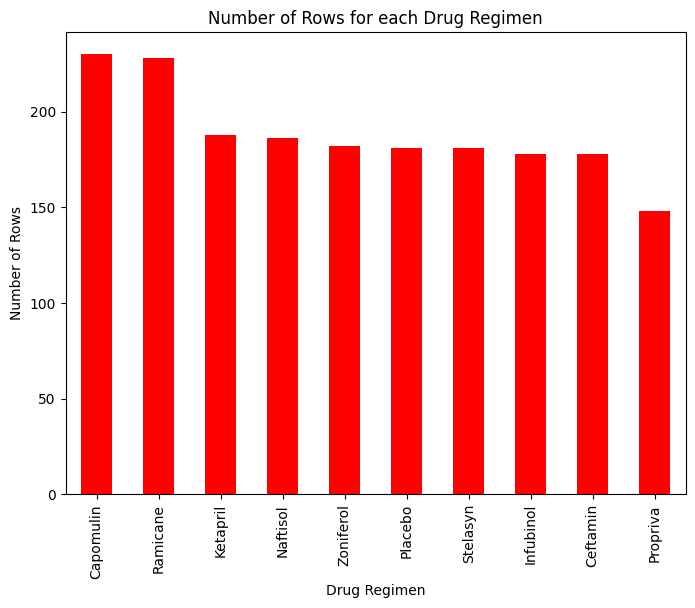

In [199]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Get total number of rows by Drug Regimen
barplot_data = clean_mouse_df['Drug Regimen'].value_counts()

#Configure plot, figsize, title and axis labels
figure1 = barplot_data.plot(kind="bar", facecolor="red", figsize=(8,6),
                             title="Number of Rows for each Drug Regimen",
                             xlabel="Drug Regimen",
                             ylabel="Number of Rows")

print(figure1)

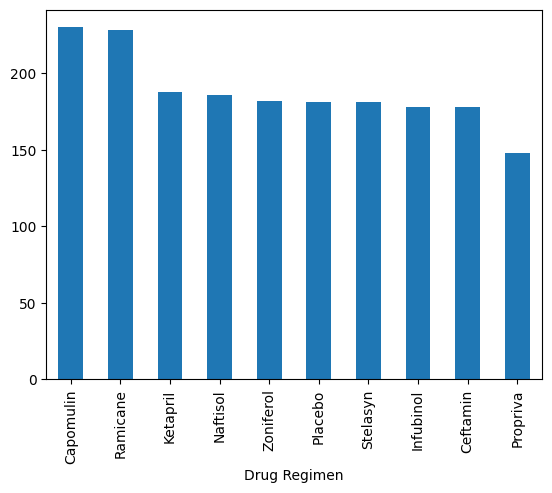

In [200]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis1 = clean_mouse_df['Drug Regimen'].value_counts()
x_axis1.plot(kind="bar")
plt.show()

<Axes: ylabel='Sex'>

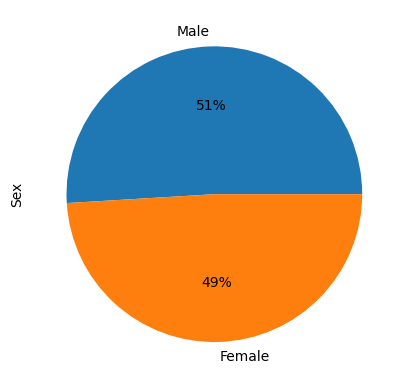

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieplot_data = clean_mouse_df['Sex'].value_counts()
Sex = ["Male", "Female"]

#Configure plot
pieplot_data.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")

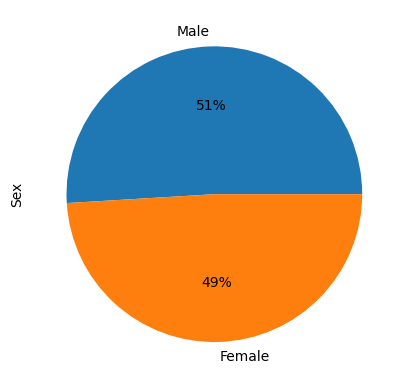

In [214]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = pieplot_data.index.values
count_value = pieplot_data.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [203]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max_df = clean_mouse_df.groupby('Mouse ID')['Timepoint'].max()
timepoint_max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(clean_mouse_df, timepoint_max_df, on=["Mouse ID","Timepoint"], how="left")
merged_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [204]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


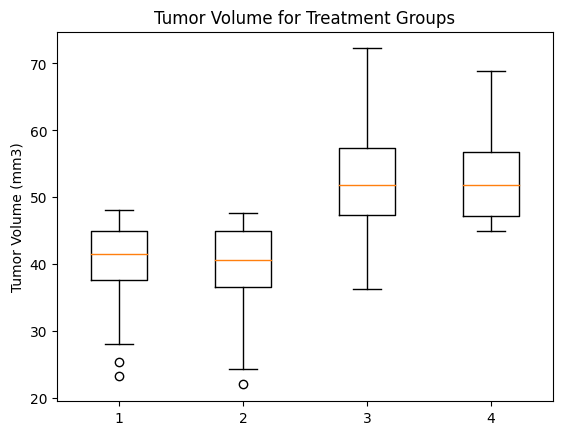

In [215]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Treatment Groups')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

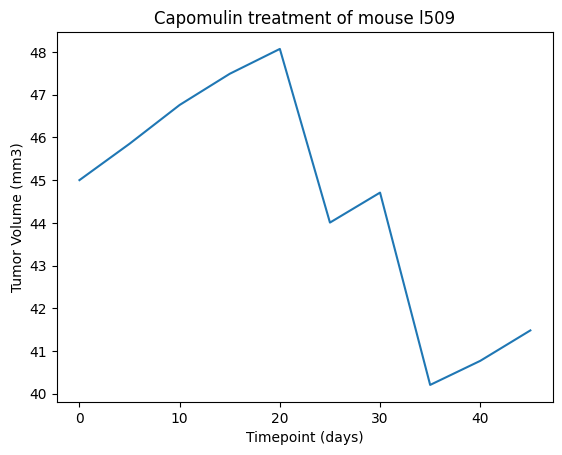

In [206]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin") & (clean_mouse_df["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

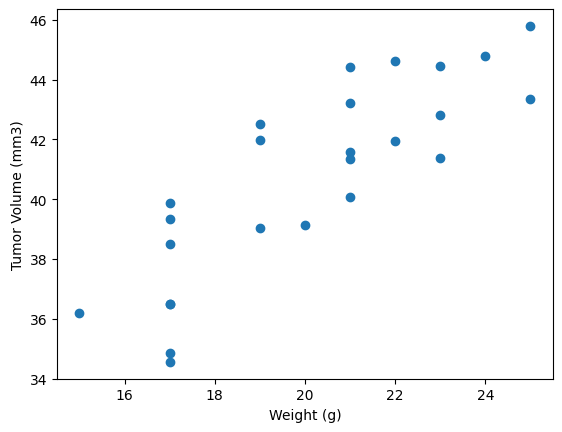

In [207]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")


avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


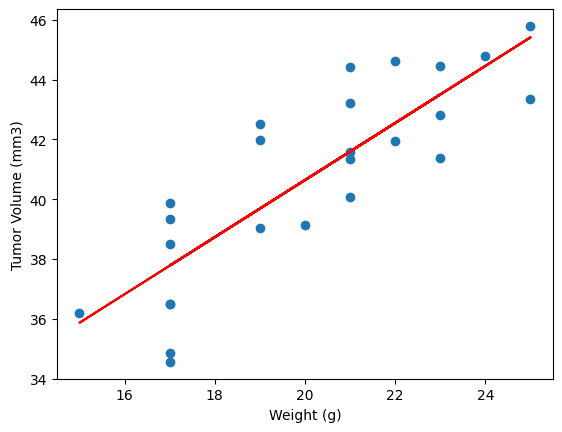

In [208]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()